# Dengue Fever Prediction
-----
Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death.

Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.

In recent years dengue fever has been spreading. Historically, the disease has been most prevalent in Southeast Asia and the Pacific islands. These days many of the nearly half billion cases per year are occurring  Latin Amrica



### The Problem
Using environmental data collected by various U.S. Federal Government agencies—from the Centers for Disease Control and Prevention to the National Oceanic and Atmospheric Administration in the U.S. Department of Commerce—can you predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru?

### Performance Metric
Performance is evaluated according to the mean absolute error.
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i |
utliers.$$

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import missingno as msno

import warnings
warnings.simplefilter("ignore")

## Load the Data

In [98]:
df_train = pd.read_csv('C:/Users/user/1/Downloads/Dengue Fever Project/dengue_features_train.csv')
df_train_labels = pd.read_csv('C:/Users/user/1/Downloads/Dengue Fever Project/dengue_labels_train.csv')
pd.set_option('display.max_columns', None)
df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [99]:
df_train.shape

(1456, 24)

In [100]:
df_train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [101]:
df = pd.merge(df_train, df_train_labels, how='inner')
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [102]:
df.shape
print(f'Number of observations: {df.shape[0]}')
print(f'Number of attributes: {df.shape[1]}')

Number of observations: 1456
Number of attributes: 25


## Data Cleaning
----

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

Let's take a first look of the distribution of each numerical variable in the dataset.

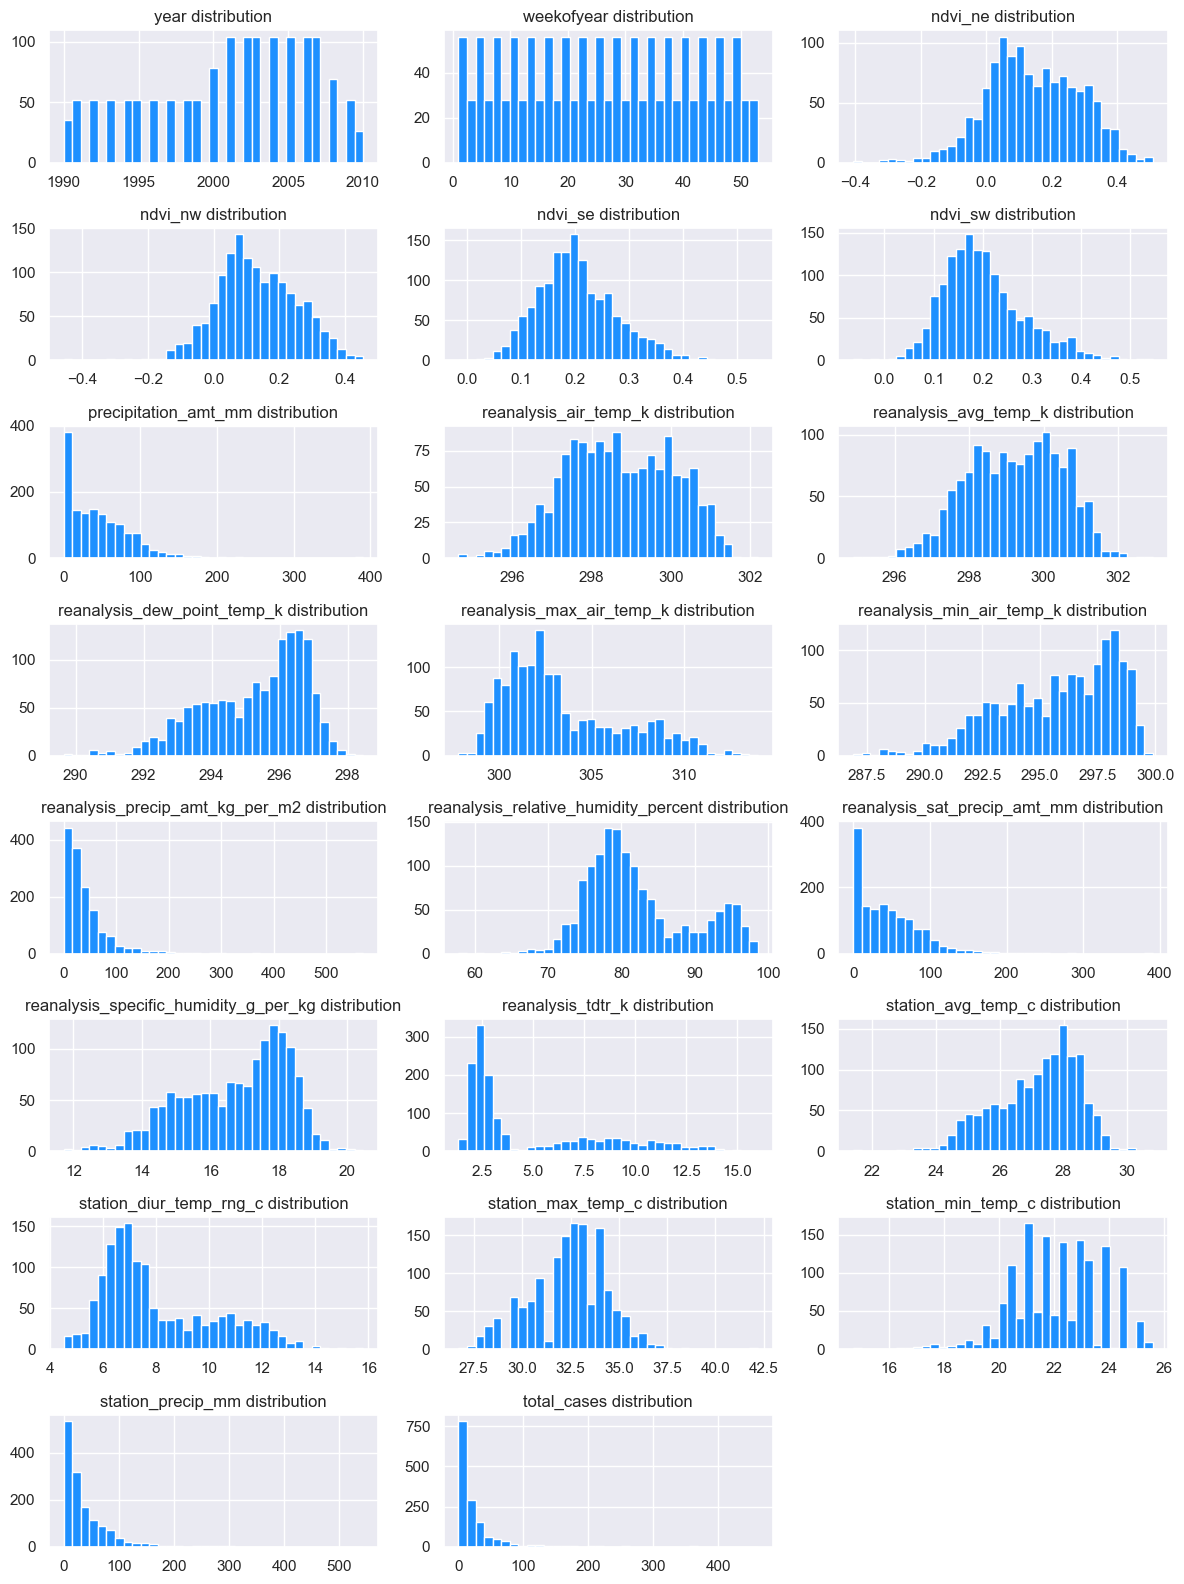

In [104]:
plt.figure(figsize=(12,16))
for i, col in enumerate(df.select_dtypes(include=['int','float']).columns, 1):
    plt.subplot(8,3,i)
    plt.hist(df[col], bins=35, color='dodgerblue')
    plt.title(f'{col} distribution')
plt.tight_layout()
plt.show()

Most predictors seem to follow the Gaussian distribution, unlike some of them like `station_precip_mm` or `reanalysis_sat_precip_mm` that suffer from extreme outliers.

In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000


In [106]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

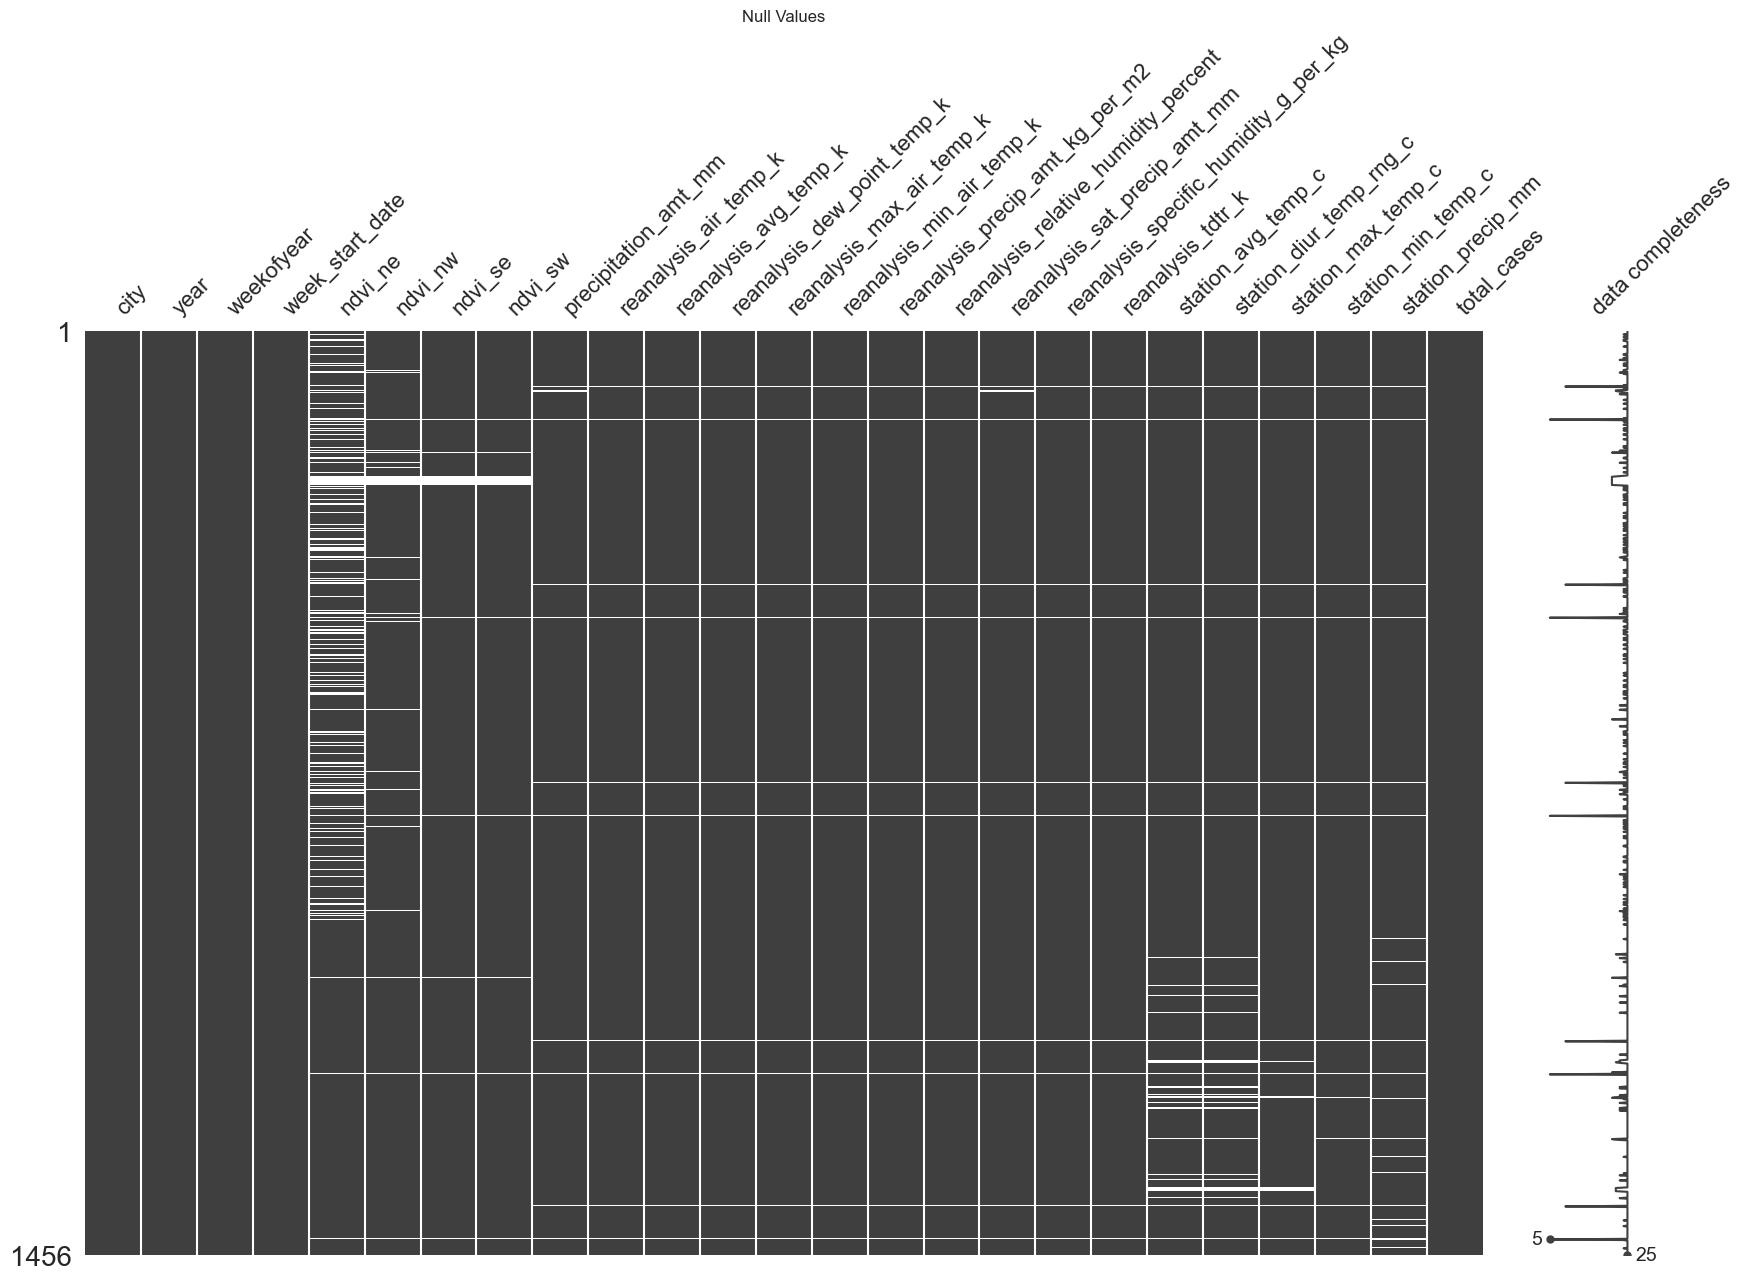

In [107]:
msno.matrix(df, labels=True, figsize=(20,12), label_rotation=45)
plt.title('Null Values')
plt.show()

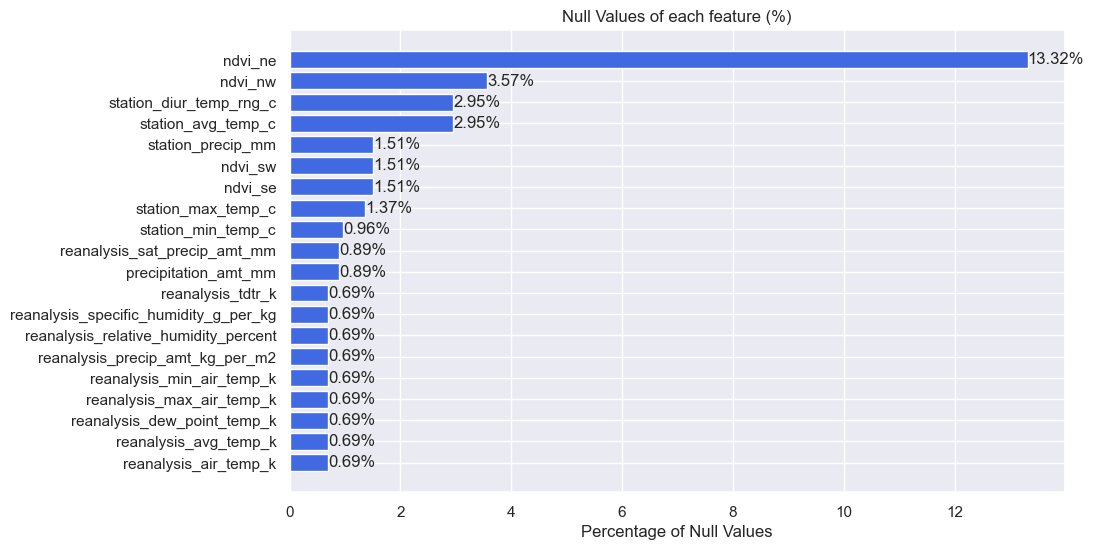

In [108]:
null_percentage = {}
for col in df.columns:
    sum_null = df[col].isnull().sum()
    sum_null_perc = 100 * sum_null / df.shape[0]
    if sum_null_perc != 0:
        null_percentage[col] = round(sum_null_perc, 2)
    else:
        continue

sorted_null_percentage = {k: v for k, v in sorted(null_percentage.items(), key=lambda item: item[1], reverse=False)}

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_null_percentage)), list(sorted_null_percentage.values()), align='center', color='royalblue')

plt.yticks(range(len(sorted_null_percentage)), list(sorted_null_percentage.keys()))
plt.xlabel('Percentage of Null Values')
plt.title('Null Values of each feature (%)')

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{list(sorted_null_percentage.values())[i]}%', va='center', ha='left')

plt.show()

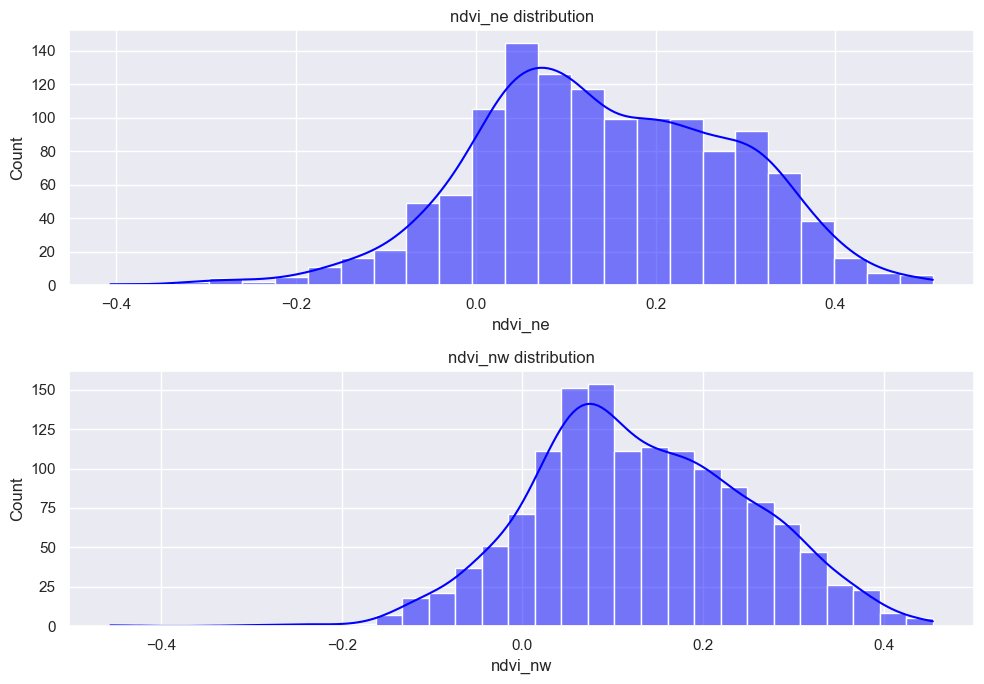

In [109]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.histplot(df['ndvi_ne'], kde=True, color = 'blue',line_kws={'color': 'black', 'lw': 1.5})
plt.title('ndvi_ne distribution')

plt.subplot(2,1,2)
sns.histplot(df['ndvi_nw'], kde=True, color = 'blue',line_kws={'color': 'black', 'lw': 1.5})
plt.title('ndvi_nw distribution')

plt.tight_layout()
plt.show()

The columns that contain the largest number of NaN values are `ndvi_ne` and `ndvi_nw`. Observing their distributions, we notice the presence of skewness with negative asymmetry. For this reason, we will choose to fill the NaN values using the median

In [110]:
# ndvi_ne
df['ndvi_ne'].fillna(df['ndvi_ne'].median(), inplace=True)
# ndvi_nw
df['ndvi_nw'].fillna(df['ndvi_nw'].median(), inplace=True)

- Since the NaN values in the rest of the columns occupy less than 5% of the data, we drop these NA values

In [111]:
df.dropna(inplace=True)

In [112]:
df.shape

(1383, 25)

## Exploratory Data Analysis

In [113]:
df.nunique()

city                                        2
year                                       21
weekofyear                                 52
week_start_date                          1011
ndvi_ne                                  1167
ndvi_nw                                  1317
ndvi_se                                  1347
ndvi_sw                                  1340
precipitation_amt_mm                     1110
reanalysis_air_temp_k                    1131
reanalysis_avg_temp_k                     586
reanalysis_dew_point_temp_k              1130
reanalysis_max_air_temp_k                 139
reanalysis_min_air_temp_k                 115
reanalysis_precip_amt_kg_per_m2          1007
reanalysis_relative_humidity_percent     1315
reanalysis_sat_precip_amt_mm             1110
reanalysis_specific_humidity_g_per_kg    1125
reanalysis_tdtr_k                         495
station_avg_temp_c                        488
station_diur_temp_rng_c                   468
station_max_temp_c                

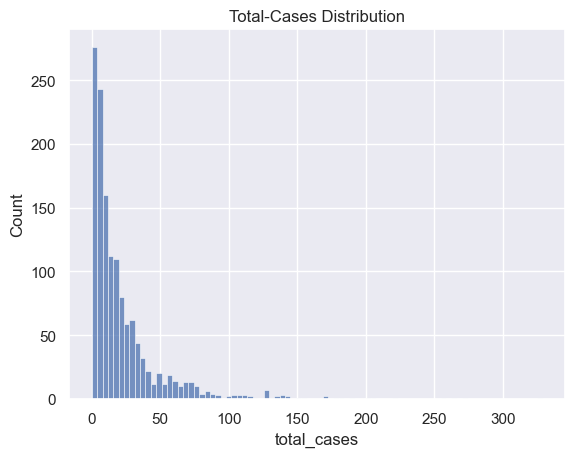

In [114]:
sns.histplot(df['total_cases'])
plt.title('Total-Cases Distribution')
plt.show()

The target variable we are interested in and try to predict next is the column `total_cases`. Observing its distribution, we conclude that suffers from extreme outliers.

sj    911
iq    472
Name: city, dtype: int64


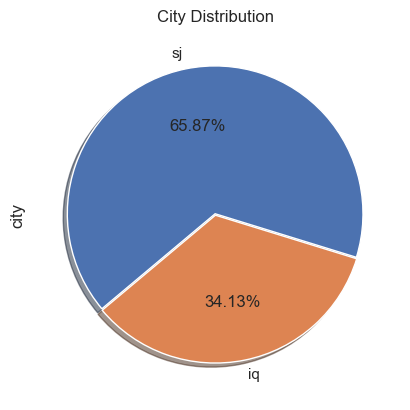

In [115]:
# city 
print(df['city'].value_counts())


expand2 = [0.01, 0.00]
labels = ['sj', 'iq']
df['city'].value_counts().plot.pie(labels = labels,autopct = '%.2f%%',shadow = True,explode = expand2,
                                    counterclock = False,startangle =220)
plt.title('City Distribution')
plt.show()

There are 2 different cities: 
- `sj` stands for San Juan in Puerto Rico
- `iq` stands for Iquitos in Peru

According to the data, two-thirds of the total cases occurred in San Juan, while approximately one-third occurred in Iquitos

In [117]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
